In [46]:
import pandas as pd  # Manipulación y análisis de datos tabulares (filas y columnas).
import numpy as np  # Operaciones numéricas y matriciales.
import seaborn as sns  # Visualización estadística de datos.
import matplotlib.pyplot as plt  # Creación de gráficos y visualizaciones.

# Matplotlib es una herramienta versátil para crear gráficos desde cero,
# mientras que Seaborn simplifica la creación de gráficos estadísticos.

from sklearn.decomposition import PCA  # Implementación del Análisis de Componentes Principales (PCA).
from sklearn.preprocessing import StandardScaler  # Estandarización de datos para análisis estadísticos.


In [47]:
# Cargar el dataset
df = sns.load_dataset("penguins")

# Mostrar las primeras filas
print(df.head())

df = df.drop(columns=["species", "island", "sex"])
df = df.dropna(axis=0)

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


## 4. Determina el Número de Grupos.
Aplica el agrupamiento jerárquico al conjunto de datos y utiliza un dendrograma para sugerir un número razonable de grupos. Justifica tu elección del número de grupos. Realiza estos pasos tal y como has visto en clase y figura en los apuntes del tema.

Primero empezaremos estandarizando los datos, para que las magnitudes de estos no opaquen los cálculos de la distancia entre los registros.


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_std.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020


Siguiente paso vamos a realizar el calculo de las distencias de similitud (o diferencia entre estos registros). Como en la teoría nos hablan tendido del método Ward, usaremos este.

In [49]:
from scipy.cluster.hierarchy import ward

distance_matrix = ward(df_std)
distance_matrix_df = pd.DataFrame(distance_matrix)

distance_matrix_df.head()

,0,1,2,3
0,225.0,311.0,0.108991,2.0
1,260.0,312.0,0.108991,2.0
2,35.0,106.0,0.126537,2.0
3,266.0,302.0,0.131843,2.0
4,75.0,142.0,0.132965,2.0


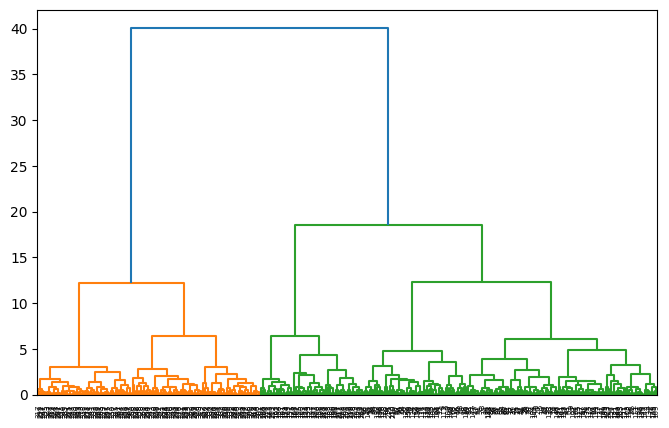

In [50]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(8, 5))
dendrogram(distance_matrix)
plt.show()

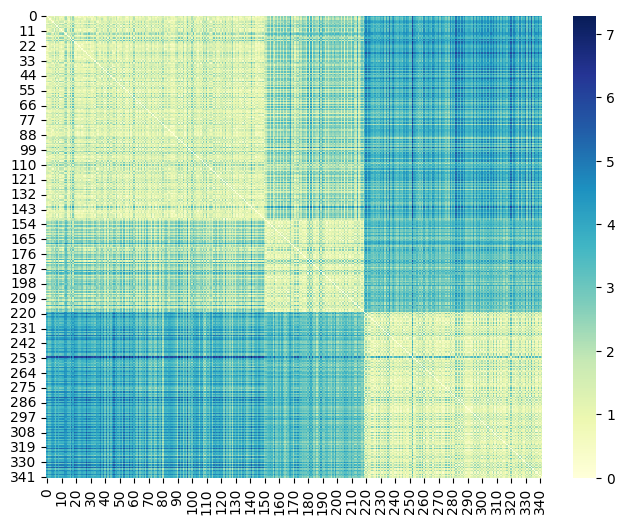

In [51]:
from scipy.spatial import distance

# Calculate the pairwise Euclidean distances
distance_matrix = pd.DataFrame(distance.cdist(df_std, df_std, 'euclidean'))

plt.figure(figsize=(8, 6))
sns.heatmap(distance_matrix, annot=False, cmap="YlGnBu", fmt=".1f")
plt.show()

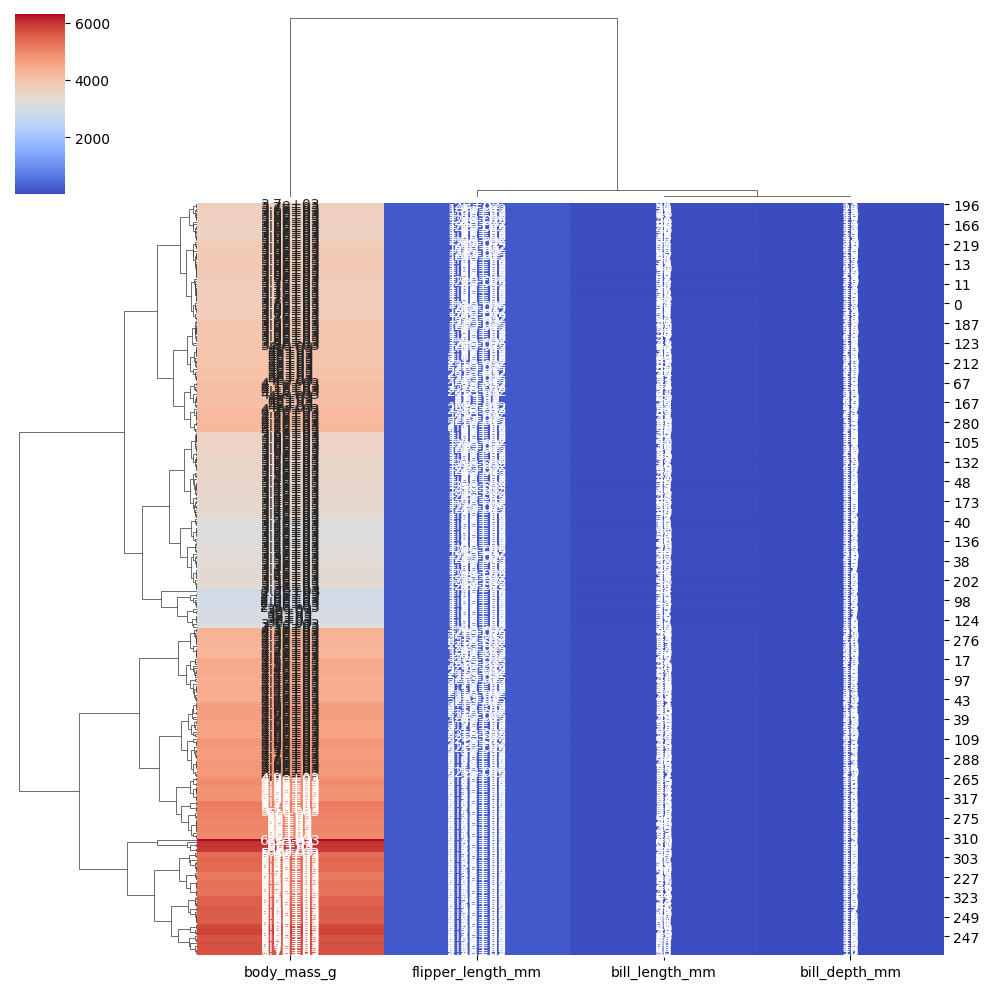

In [52]:
# Create the heatmap
sns.clustermap(df, cmap='coolwarm', annot=True)

# Display the plot
plt.show()


In [53]:
from scipy.spatial import distance

# Calculate the pairwise Euclidean distances
distance_matrix = distance.cdist(df, df, 'euclidean')

# The distance_matrix is a 2D array containing the Euclidean distances between all pairs of observations.
distance_small = distance_matrix[:5, :5]

# Index are added to the distance matrix
distance_small = pd.DataFrame(distance_small, index=df.index[:5], columns=df.index[:5])

distance_small_rounded = distance_small.round(2)
print("Distance Matrix:\n", distance_small_rounded)


Distance Matrix:
         0       1       2       4       5
0    0.00   50.27  500.20  300.25  100.42
1   50.27    0.00  550.07  350.09  150.09
2  500.20  550.07    0.00  200.05  400.04
4  300.25  350.09  200.05    0.00  200.04
5  100.42  150.09  400.04  200.04    0.00


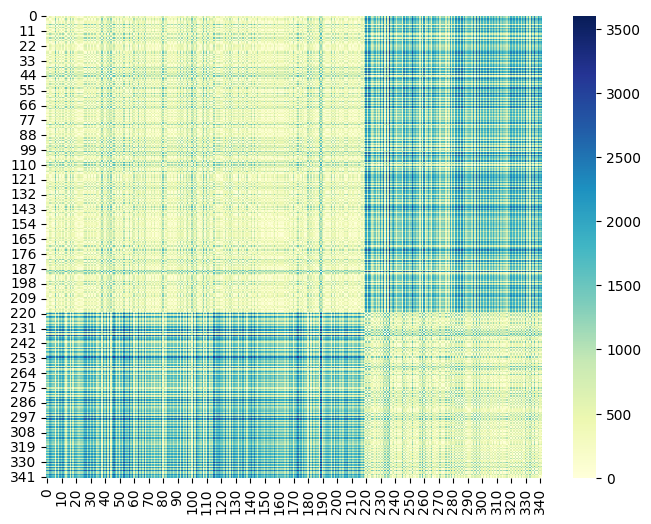

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(distance_matrix, annot=False, cmap="YlGnBu", fmt=".1f")
plt.show()


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

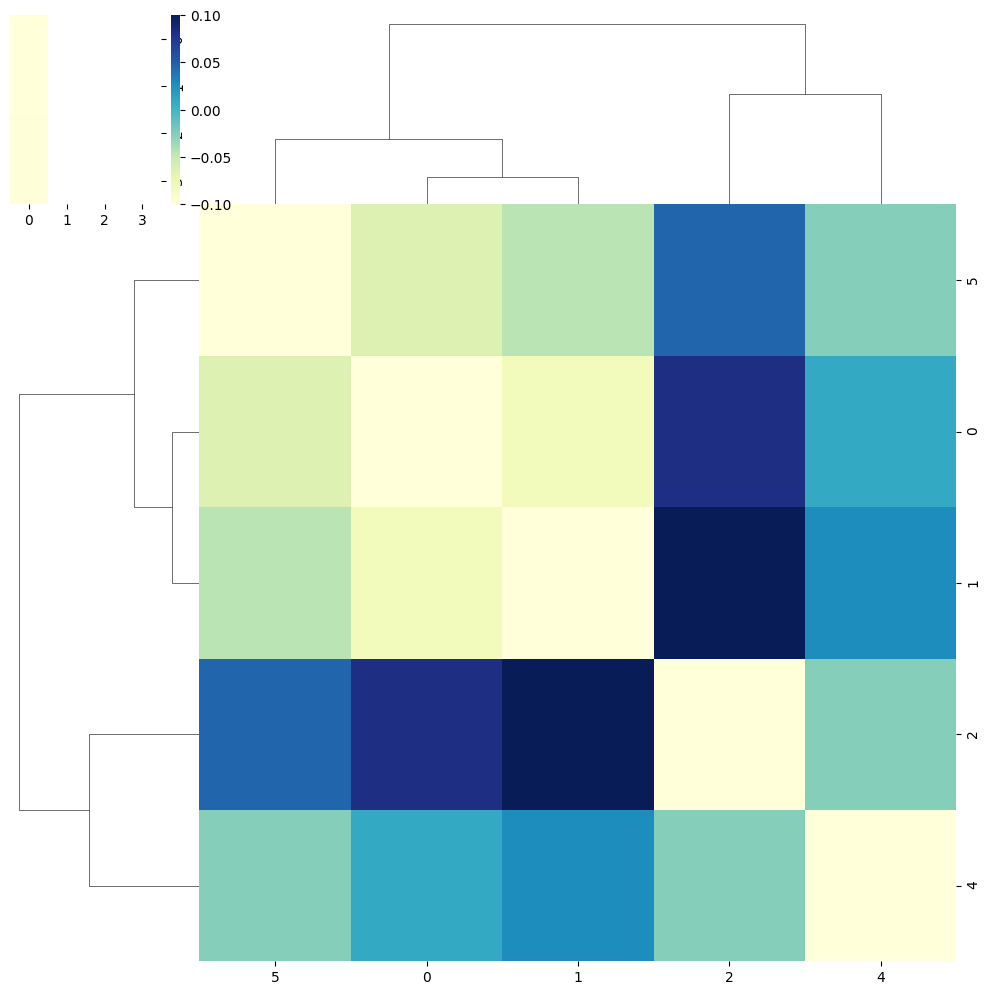

In [55]:
# Perform hierarchical clustering to get the linkage matrix
linkage = sns.clustermap(distance_small, cmap="YlGnBu", fmt=".1f",
                         annot=False, method="average").dendrogram_row.linkage

# Reorder the data based on the hierarchical clustering
order = pd.DataFrame(linkage, columns=["cluster_1", "cluster_2", "distance", "new_count"]).index
reordered_data = df.reindex(index=order, columns=order)

# Optionally you can add color bar
sns.heatmap(reordered_data, annot=False, cmap="YlGnBu", fmt=".1f")


In [56]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame to standardize the columns
df_std = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [57]:
# Calculate the pairwise Euclidean distances
distance_std = distance.cdist(df_std, df_std, "euclidean")
print(distance_std[:5, :5].round(2))


[[0.   0.76 1.25 1.08 1.16]
 [0.76 0.   1.   1.28 1.66]
 [1.25 1.   0.   0.98 1.47]
 [1.08 1.28 0.98 0.   0.88]
 [1.16 1.66 1.47 0.88 0.  ]]


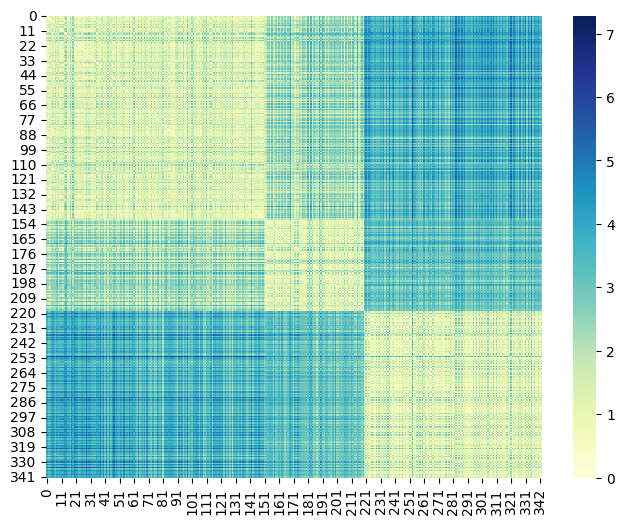

In [58]:
plt.figure(figsize=(8, 6))
df_std_distance = pd.DataFrame(distance_std, index=df_std.index, columns=df.index)
sns.heatmap(df_std_distance, annot=False, cmap="YlGnBu", fmt=".1f")
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17096\33805938.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(df_std_distance, method='ward')


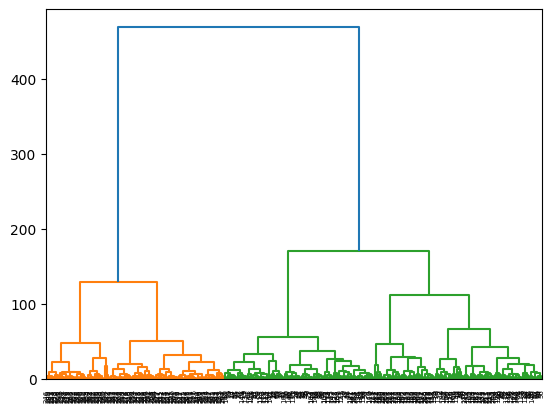

In [59]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Calculate the linkage matrix
linkage_matrix = sch.linkage(df_std_distance, method='ward')

# Create the dendrogram
dendrogram = sch.dendrogram(linkage_matrix)

# Display the dendrogram
plt.show()


In [60]:
# Assign data points to 4 clusters
from scipy.cluster.hierarchy import fcluster

num_clusters = 4
cluster_assignments = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Display the cluster assignments
print("Cluster Assignments:", cluster_assignments)

plt.show()#


Cluster Assignments: [3 3 3 3 4 3 4 3 4 3 3 3 4 4 3 3 4 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 3
 3 4 3 4 3 4 3 4 3 3 3 4 3 4 3 4 3 4 3 4 3 3 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 3 3 4 3 4 3 4 3 4 3 3 3 3 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 3 3 4 3 4 3 4
 3 4 4 4 3 4 3 3 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 3 3 4 3 4 3 3 3 3 3 3 4 3 3
 3 3 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 3 4 4 4 4 4 4 4 3 4 3 4
 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 2 1 2
 1 1 2 2 2 2 2 2 2 2 1 2 1 2 1 2 1 1 2 2 2 2 2 2 1 2 1 1 2 2 1 1 2 2 2 2 2
 2 1 2 2 1 2 2 1 2 2 2 1 2 1 2 2 2 2 2 1 2 1 2 1 2 1 2 1 2 1 2 2 2 2 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 2 2 1 2 1 2 1 2 2 2 1 2 2 2 1 2 1
 2 1 2 1 2 2 1 2 2]


In [61]:
# Create a new column ‘Cluster’ and assign the cluster assignments
df['Cluster4'] = cluster_assignments
print(df["Cluster4"])


0      3
1      3
2      3
4      3
5      4
      ..
338    2
340    2
341    1
342    2
343    2
Name: Cluster4, Length: 342, dtype: int32


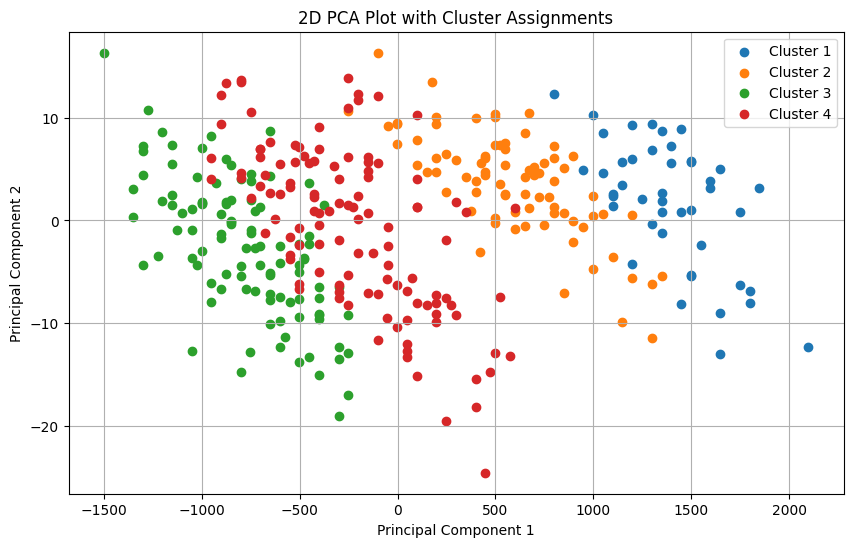

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

# Create a new DataFrame for the 2D principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Create a scatter plot with colors for clusters
plt.figure(figsize=(10, 6))

for cluster in np.unique(cluster_assignments):
    plt.scatter(df_pca.loc[cluster_assignments == cluster, 'PC1'],
                df_pca.loc[cluster_assignments == cluster, 'PC2'],
                label=f'Cluster {cluster}')

plt.title("2D PCA Plot with Cluster Assignments")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


## 5. Agrupamiento K-Means.
Implementa el algoritmo de agrupamiento k-means en el conjunto de datos. Experimenta con diferentes valores de k y utiliza métricas apropiadas (por ejemplo, método del codo) para determinar el número óptimo de grupos. 

In [63]:
from sklearn.cluster import KMeans

# Set the number of clusters (k=4)
k = 4

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the KMeans model to your standardized data
kmeans.fit(df_std)

# Get the cluster labels for your data
kmeans_cluster_labels = kmeans.labels_


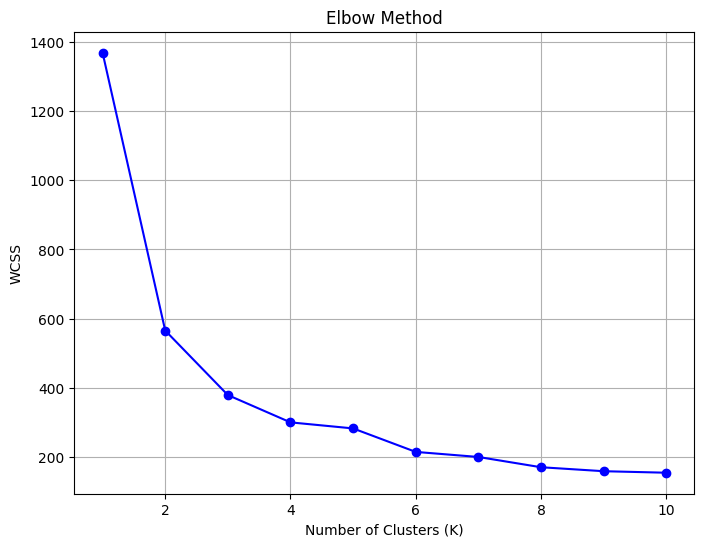

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create an array to store the WCSS values for different values of K:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values to find the elbow point
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


## 6. Validación del Agrupamiento.
Aplica métricas de validación del agrupamiento (por ejemplo, puntuación de silueta) para evaluar la calidad de los resultados del agrupamiento. Discute la efectividad del algoritmo de agrupamiento en capturar la estructura inherente de los datos tal y como se ha visto en clase.

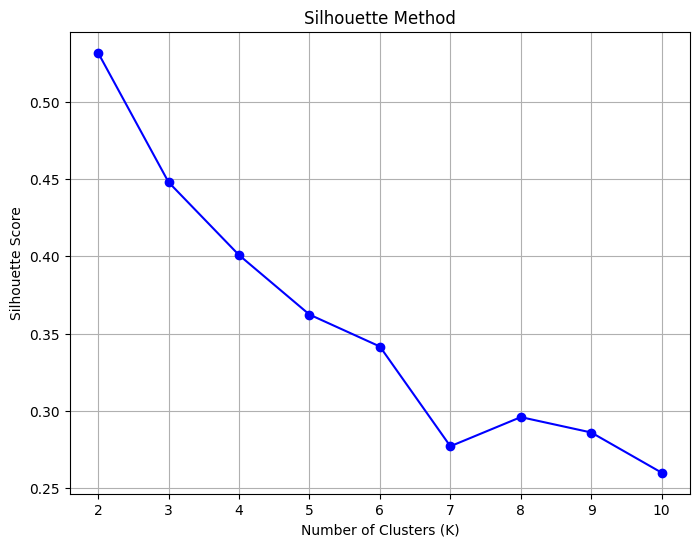

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create an array to store silhouette scores for different values of K
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_std)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_std, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17096\4264625130.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(i) / 4)


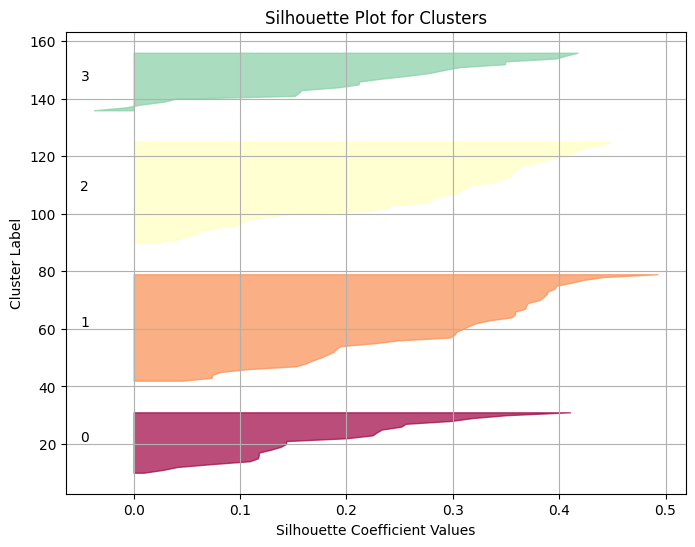

In [66]:
from sklearn.metrics import silhouette_samples

# Calculates silhouette scores for each cluster
silhouette_values = silhouette_samples(df_std, labels)

plt.figure(figsize=(8, 6))
y_lower = 10

for i in range(4):
    ith_cluster_silhouette_values = silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.get_cmap("Spectral")(float(i) / 4)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title("Silhouette Plot for Clusters")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.grid(True)
plt.show()


## 7. Jerárquico versus K-Means.
Compara y contrasta los resultados obtenidos del agrupamiento jerárquico y el agrupamiento k-means. Discute similitudes o diferencias en las asignaciones de los grupos.

## 8. Proporciona una interpretación de los grupos. 
¿Qué representan los grupos identificados en el contexto de las especies de pingüinos? ¿Existen patrones o tendencias significativas?

## 9. Resume tus hallazgos y concluye el análisis. Discute limitaciones o desafíos encontrados durante el proceso de agrupamiento.